# Graphical abstract images based on Figure 4

## Import RNAvigate


In [1]:
import rnavigate as rnav


## Define the experimental samples and provide input file names


In [2]:
common_data = rnav.Sample(
    sample='',
    ss="RC_CRYSTAL_STRUCTURE.xrna",
    pdb={"pdb": "3dhsCrystal_PlusLoops.pdb",
         "chain":"A"},
    catalytic_core={
        "spans": [[236, 240], [181, 188], [45, 47], [49, 49], [127, 128]],
        "sequence": "ss",
        "color": "DarkOrchid",
        "name": "catalytic core"},
    P5={
        "spans": [[58, 62], [101, 105]],
        "sequence": "ss",
        "color": "orange",
        "name": "P5 helix"},
    P2={
        "spans": [[189, 195], [15, 21]],
        "sequence": "ss",
        "color": "DodgerBlue",
        "name": "P2 helix"},
    loop_loop={
        "spans": [[70, 75], [141, 146]],
        "sequence": "ss",
        "color": "red",
        "name": "L5.1 - L15.1"},
    )

rc1200 = rnav.Sample(
    sample="fully folded",
    inherit=common_data,
    dmsmap="RC1200_rnasep_profile.txt",
    ringmap="RC1200_rnasep_rings.txt")


## Additional information for each sample


In [3]:
rc1200.data["ringmap"].data.eval("MI = 0.5 * Statistic / Mod_Depth", inplace=True)


## Custom color list


In [4]:
annotations_list = ["catalytic_core", "P5", "P2", "loop_loop"]
color_list, cmap = common_data.get_data("ss").get_colors_from_annotations(
    annotations=common_data.get_data(annotations_list)
    )


## 3D structure

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

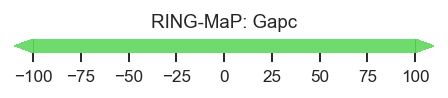

In [5]:
plot = rnav.plot_mol(
    samples=[rc1200],
    structure="pdb",
    interactions={
        'interactions': 'ringmap',
        'structure': 'ss',
        'MI_ge': 0.000025,
        'Zij_ge':2,
        'ss_only': True,
        'Statistic_ge':23,
        'min_cd': 6,
        'positive_only': True,
        'cmap': 'limegreen'},
    colors=color_list,
    hide_cylinders=True,
    width=800,
    height=800,
    background_alpha=0,
    orientation=[-35.06,-98.79,-28.57,-245.66,0.14,0.52,0.62,-0.57],
    title=False
    )


In [6]:
# plot.save()


## Arc plot


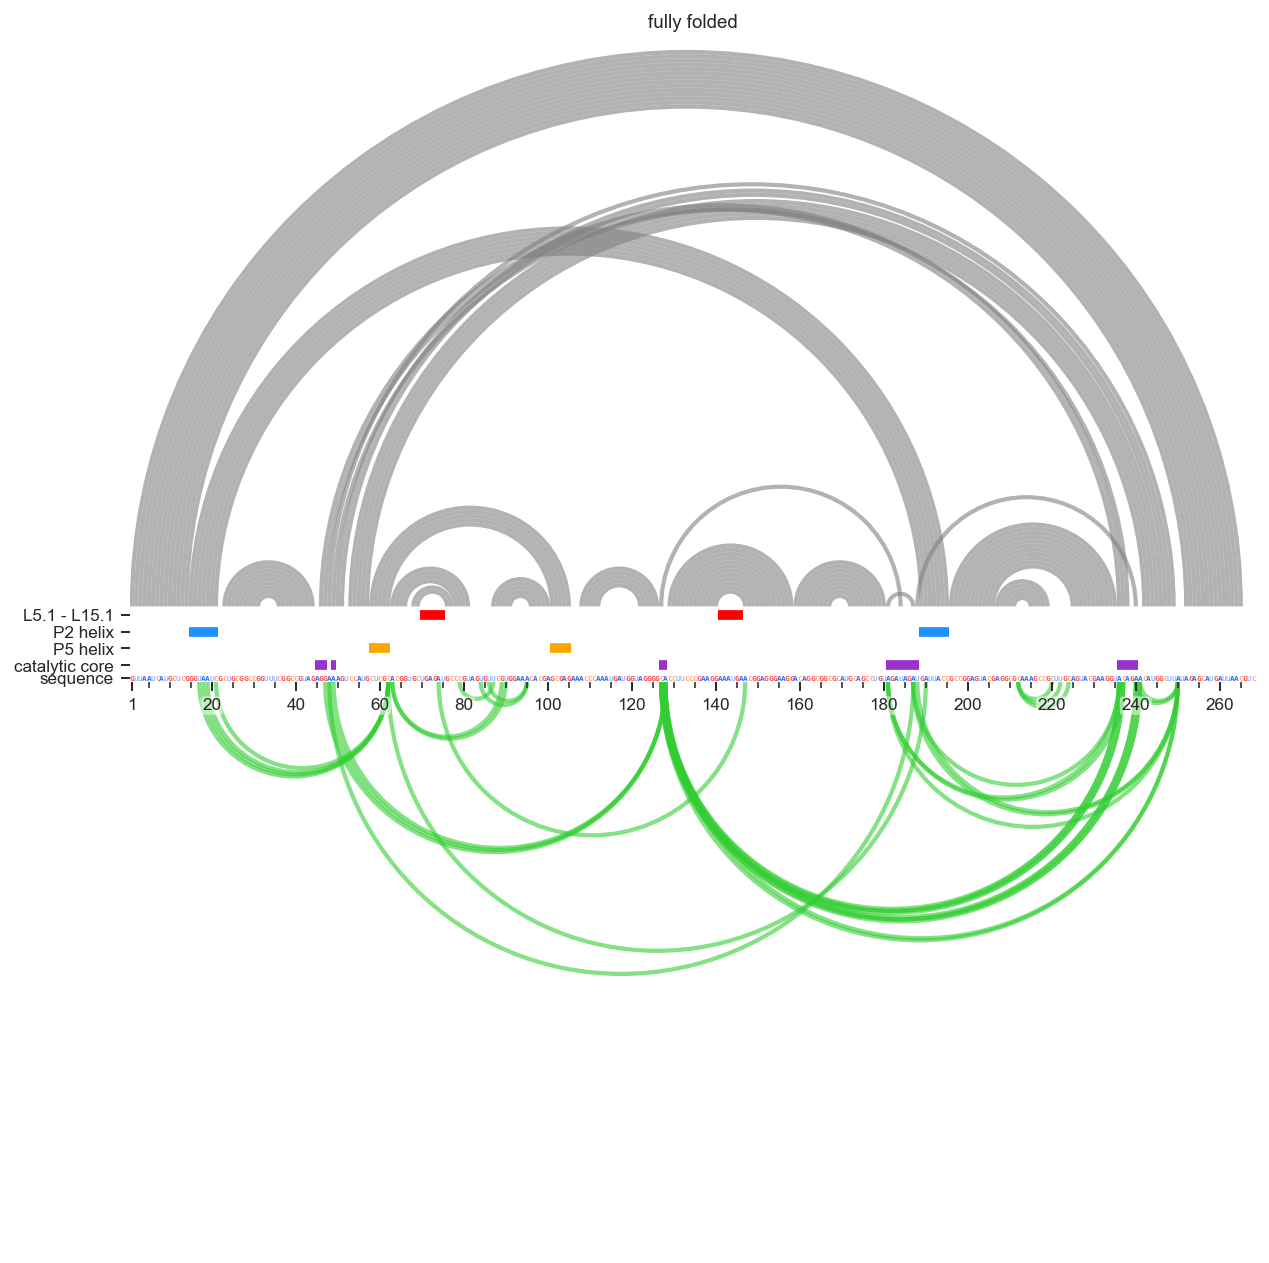

In [7]:
plot = rnav.plot_arcs(
    samples=[rc1200],
    sequence="ss",
    structure="ss",
    interactions={
        "interactions": "ringmap",
        "structure": "ss",
        "MI_ge": 0.00025,
        "Statistic_ge":23,
        "min_cd": 6,
        "positive_only": True,
        # if new_rings is True, color="limegreen" else "khaki"
        "cmap": "limegreen",
        # "metric": "new_rings",
        "normalization": "none"},
    annotations=annotations_list,
    # annotation_mode="bar",
    colorbars=False
    )

# plot.save("arc_plot.svg")


## Structure diagram

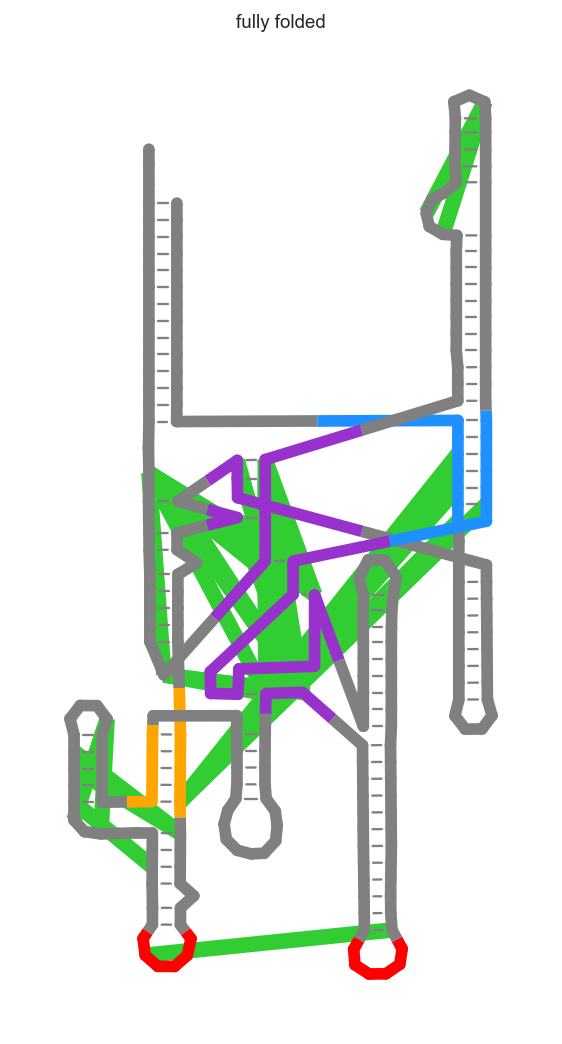

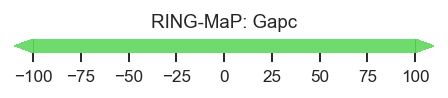

In [8]:
temp_settings = {
    "ss": {
        "interactions": {
            "linewidth": 8,
            "alpha": 1},
        "nucleotides": {
            "s": 6**2},
        "structure": {
            "zorder": 40,
            "linewidth": 6},
        "basepairs": {
            "zorder": 39}
    }}
with rnav.styles.Settings(temp_settings):
    plot = rnav.plot_ss(
        samples=[rc1200],      # Make one structure diagram for each sample in our list
        structure="ss",
        interactions={
            "interactions": "ringmap", # show ringmap interactions
            "structure": "ss",         # use the "ss" structure drawing to filter by structural features
            "MI_ge": 0.00025,          # Only include RINGs with MI value greater than or equal to 0.00025
            "Statistic_ge":23,         # Only include RINGs with Gapc value greater than or equal to 23
            "min_cd": 6,               # Only include RINGs with contact distance of at least 5
            "positive_only": True,     # Only include RINGs with a positive correlation
            "cmap":"limegreen",         # Set the color of all rings to "limegreen"
            },
        bp_style="line",               # represent base-pairs with solid lines
        colors={
            "structure": color_list,   # Apply custom color list to the backbone of the structure
            "nucleotides": color_list,
            },
        )

# plot.save("ss_plot.svg")


## Heatmaps

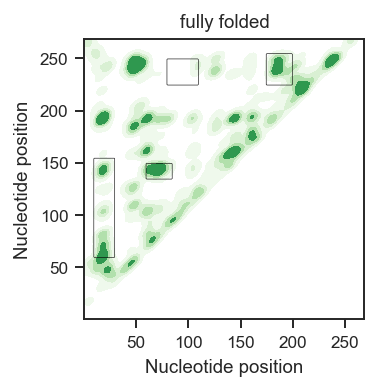

In [9]:
regions = [((225,250), (80,110)),     # ((x1, x2), (y1, y2))
           ((225,255), (175,200)),    # highlights interactions between region
           ((135,150), (60,85)),      # x1-x2 and y1-y2
           ((60,155), (10, 30))]

plot = rnav.plot_heatmap(
    samples=[rc1200],              # 1 plot for each of three samples
    sequence="ss",                    # align all data to the secondary structure sequence
    structure="ss",                   # use nucleotide positions from "ss" data (excludes the structure cassetes)
    interactions={
        "interactions": "ringmap",    # Plot RING-MaP interactions
        "positive_only": True,        # remove negative correlations
        "cmap": "Greens",             # use matplotlib "Greens" colormap
        },
    regions=regions,                  # draw boxes around regions
    plot_type="kde")                  # plot RINGs density instead of individual RINGs

# plot.save("heatmap.svg")
